# 80_ra271.352_dec-29.642_MAXIJ1803

In [6]:
from pathlib import Path
import numpy as np
import arviz as az
import graphviz as gv
import utility_functions as ufn
import importlib

importlib.reload(ufn)
az.style.use("arviz-white")

RANDOM_SEED = 2023-10-10
rng = np.random.default_rng(RANDOM_SEED)

OVERWRITE_TRACES = False

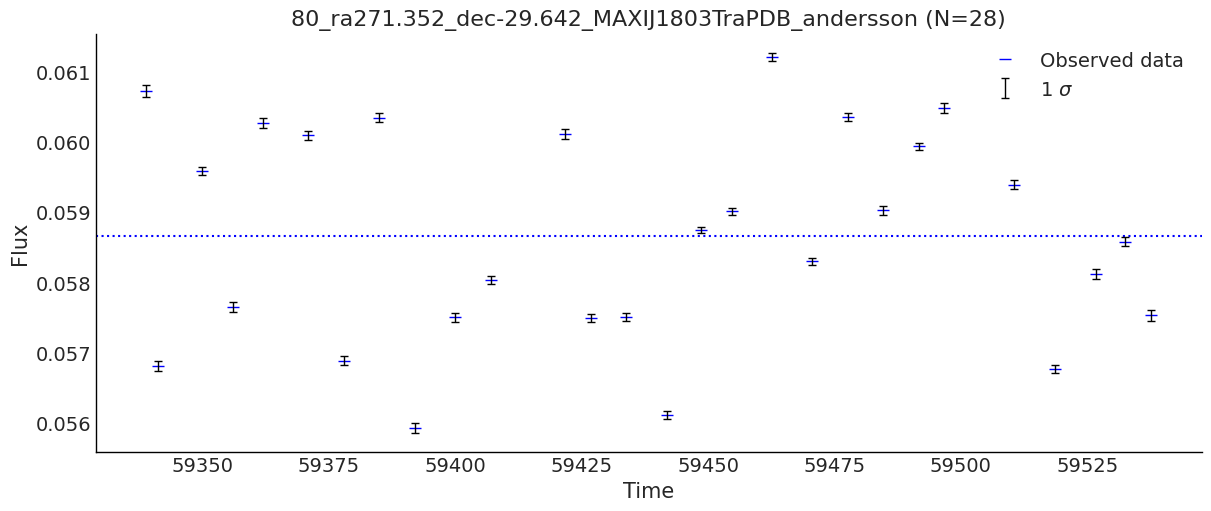

In [7]:
# File paths to CSVs of flux density observations.
csv_paths_list = sorted(list(Path('data_raw').iterdir()))
csv_path = csv_paths_list[3]
ufn.plot_lc(csv_path)

## SE Kernel only

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{SE}(\tau))$$

$$k_\textrm{SE}(\tau) = \eta^2_\textrm{SE}\exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\}$$

$$\log 2\ell^2_\textrm{SE} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log \eta_\textrm{SE} \sim \mathcal{U}[-15, 5]$$

$$\sigma_{\textrm{WN},i} \sim \textrm{HalfNormal}(e_i^2)$$

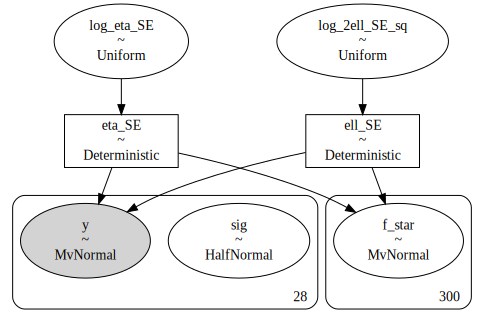

In [8]:
se_trace_path = Path(f"traces/{csv_path.stem}_se_idata.nc")
se_dag_path = Path(f'dags/{csv_path.stem}_se_dag.dot')

if se_trace_path.is_file() and not OVERWRITE_TRACES:
    se_trace = az.from_netcdf(se_trace_path)
    se_dag = gv.Source.from_file(se_dag_path)
else:
    se_trace, se_dag = ufn.fit_se_gp(csv_path, rng_seed=rng);
    az.to_netcdf(se_trace, se_trace_path)
    with open(se_dag_path, 'w') as writehandle:
        writehandle.write(se_dag.source)

gv.Source(se_dag.source)

In [9]:
variable_names = ["log_2ell_SE_sq", "log_eta_SE", "ell_SE", "eta_SE"]
ufn.print_post_summary(se_trace_path, variable_names)

median        mad     eti_16%     eti_84%  mcse_median  \
log_2ell_SE_sq   10.847290   0.248658   10.406328   11.143429     0.009463   
log_eta_SE       -3.111810   0.253012   -3.466584   -2.692149     0.008299   
ell_SE          160.303918  20.160865  128.585038  185.887376     0.759234   
eta_SE            0.044520   0.010996    0.031223    0.067735     0.000369   

                 ess_median     ess_tail     r_hat        mean         sd  
log_2ell_SE_sq  2964.709021  1666.081723  1.000234   10.782221   0.359508  
log_eta_SE      3393.385188  2129.773588  1.001139   -3.077353   0.395778  
ell_SE          2964.709021  1666.081723  1.000223  157.570630  26.351269  
eta_SE          3393.385188  2129.773588  1.001103    0.050227   0.024357

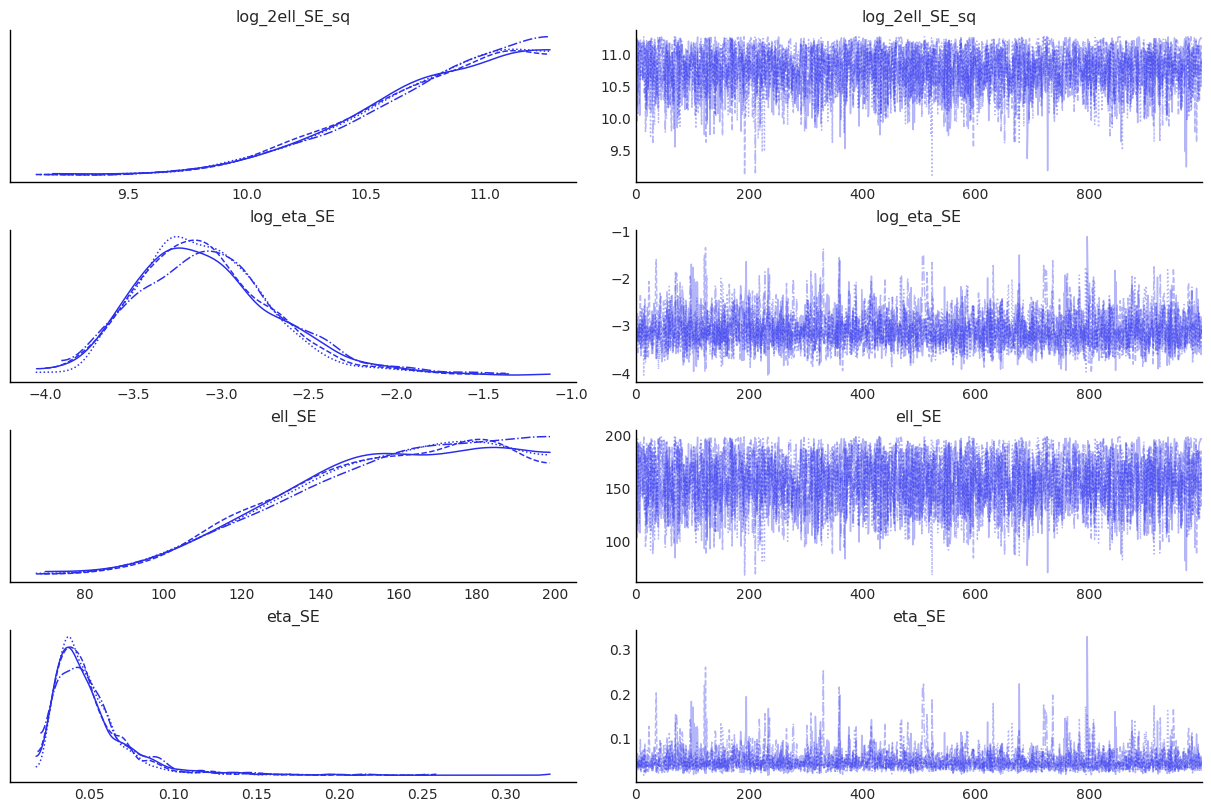

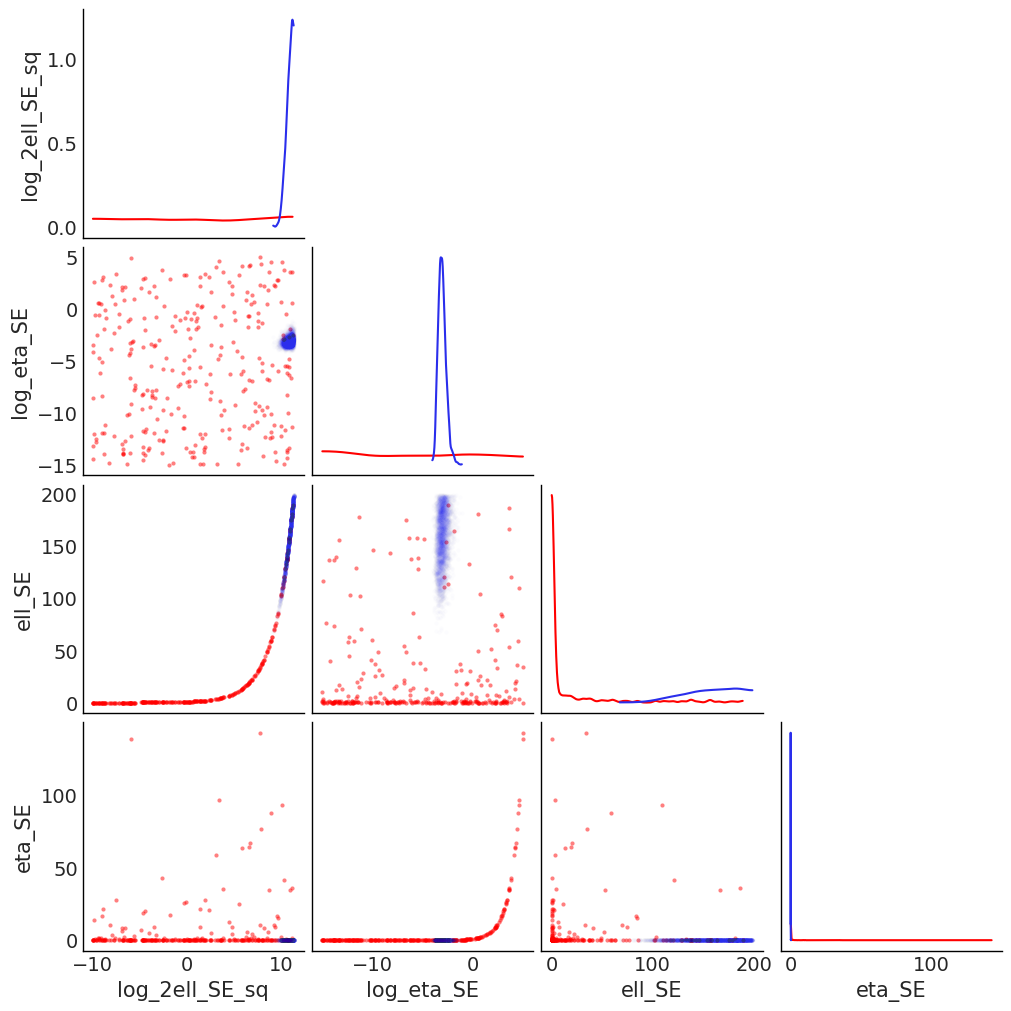

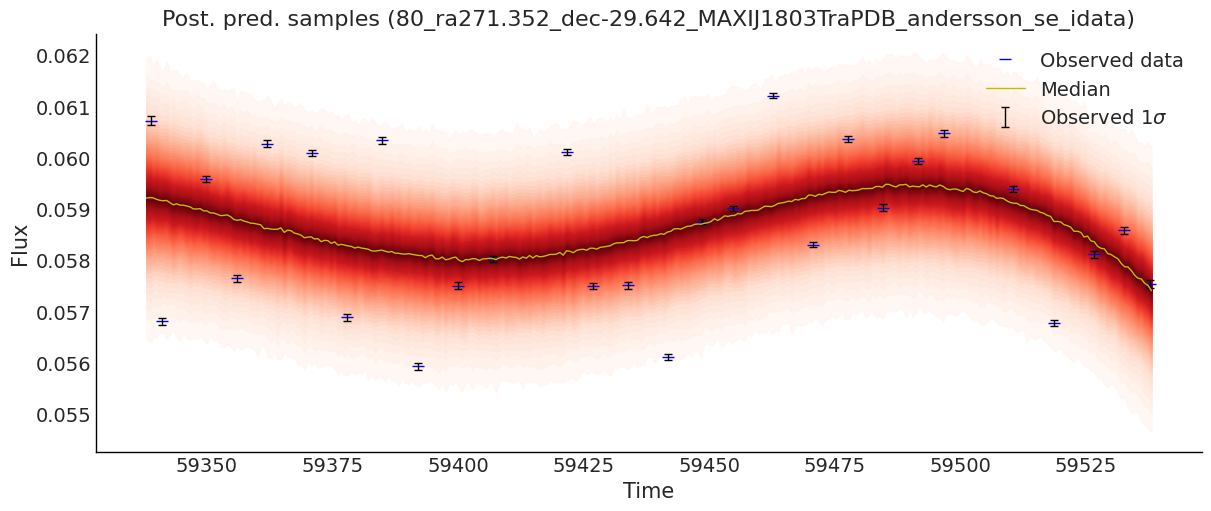

In [10]:
ufn.plot_traces(se_trace_path, variable_names)
ufn.plot_priorpost_cnr(se_trace_path, variable_names)
ufn.plot_postpred_samples(se_trace_path, csv_path)

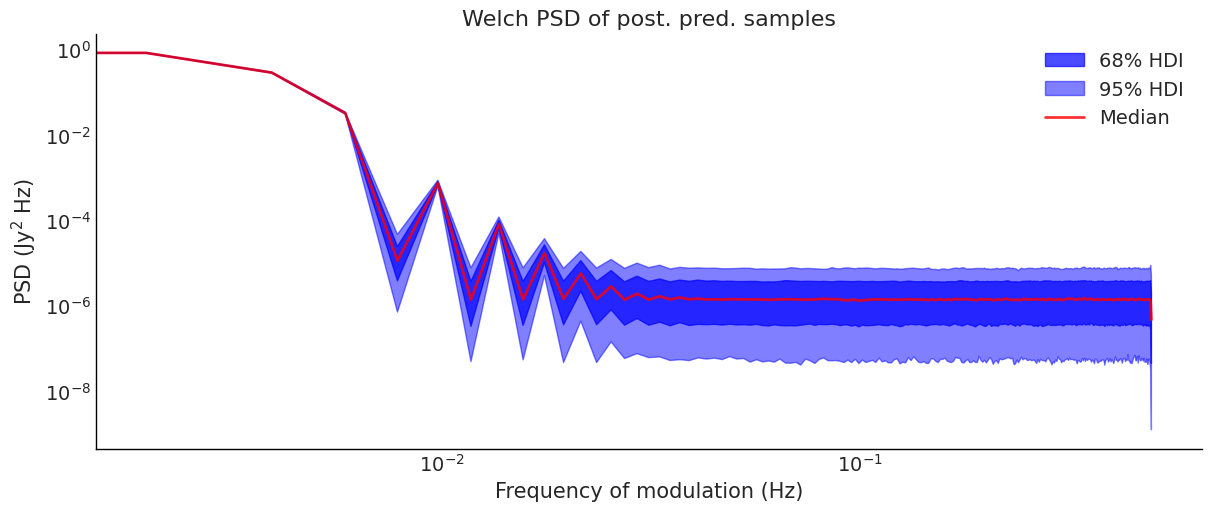

In [11]:
ufn.plot_welch_psd(se_trace);

## Matern $\frac{3}{2}$ Kernel only

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{M}(\tau))$$

$$k_\textrm{M}(\tau) =  \eta_\textrm{M}^2\left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\}$$

$$\log 2\ell^2_\textrm{M} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log \eta_\textrm{M} \sim \mathcal{U}[-15, 5]$$

$$\sigma_{\textrm{WN,i}} \sim \textrm{HalfNormal}(e_i^2)$$

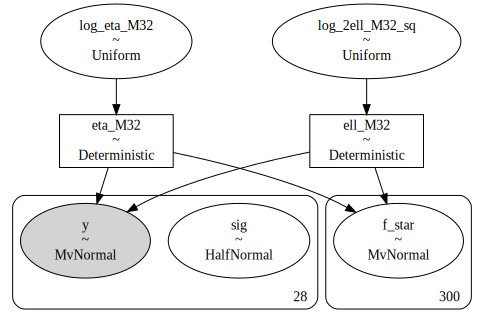

In [12]:
m32_trace_path = Path(f"traces/{csv_path.stem}_m32_idata.nc")
m32_dag_path = Path(f'dags/{csv_path.stem}_m32_dag.dot')

if m32_trace_path.is_file() and not OVERWRITE_TRACES:
    m32_trace = az.from_netcdf(m32_trace_path)
    m32_dag = gv.Source.from_file(m32_dag_path)
else:
    m32_trace, m32_dag = ufn.fit_m32_gp(csv_path, rng_seed=rng);
    az.to_netcdf(m32_trace, m32_trace_path)
    with open(m32_dag_path, 'w') as writehandle:
        writehandle.write(m32_dag.source)

gv.Source(m32_dag.source)

In [13]:
variable_names = ["log_2ell_M32_sq", "log_eta_M32", "ell_M32", "eta_M32"]
ufn.print_post_summary(m32_trace_path, variable_names)

median        mad     eti_16%     eti_84%  mcse_median  \
log_2ell_M32_sq   11.096033   0.123500   10.821556   11.229878     0.004709   
log_eta_M32       -3.558576   0.179622   -3.808849   -3.278311     0.004624   
ell_M32          181.533972  11.356953  158.254500  194.098445     0.427159   
eta_M32            0.028479   0.005047    0.022174    0.037692     0.000132   

                  ess_median     ess_tail     r_hat        mean         sd  
log_2ell_M32_sq  3676.794463  1499.783589  1.000298   11.029229   0.226805  
log_eta_M32      4192.234531  2761.480532  1.000836   -3.541112   0.271340  
ell_M32          3676.794463  1499.783589  1.000298  176.640546  18.470567  
eta_M32          4192.234531  2761.480532  1.000755    0.030108   0.008812

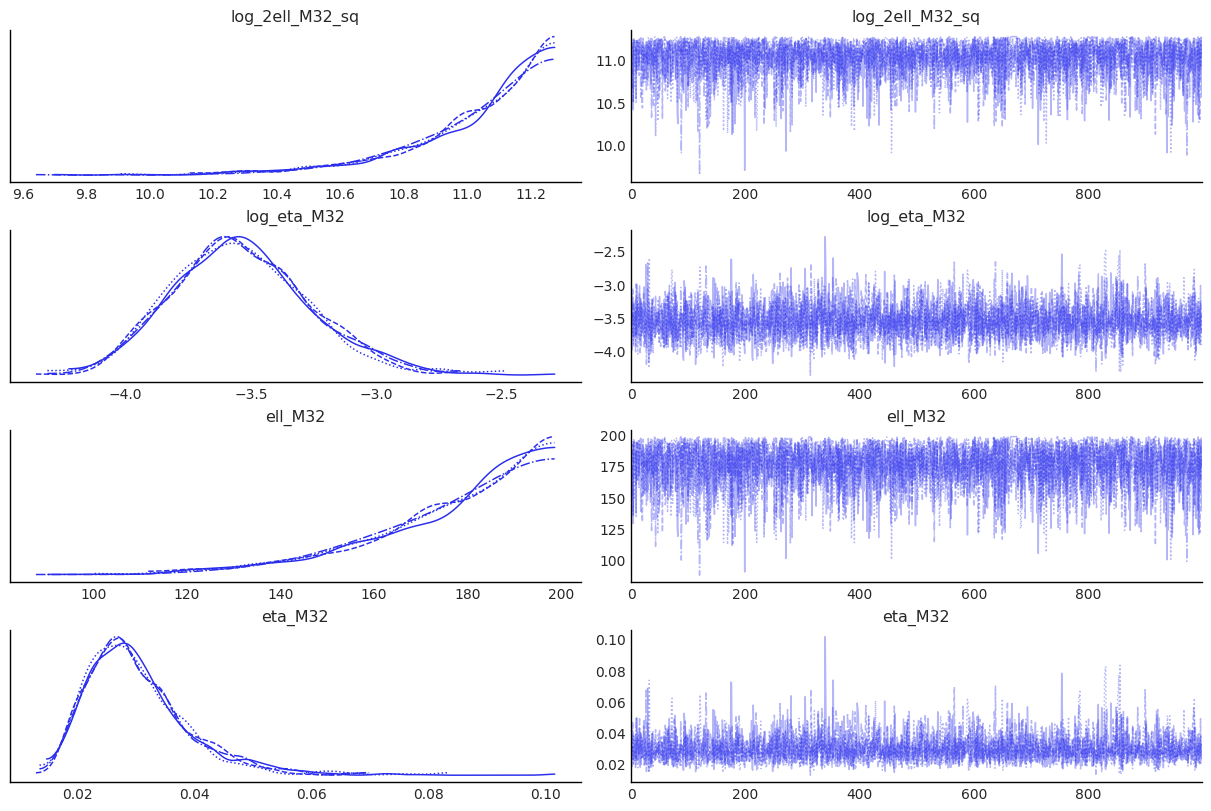

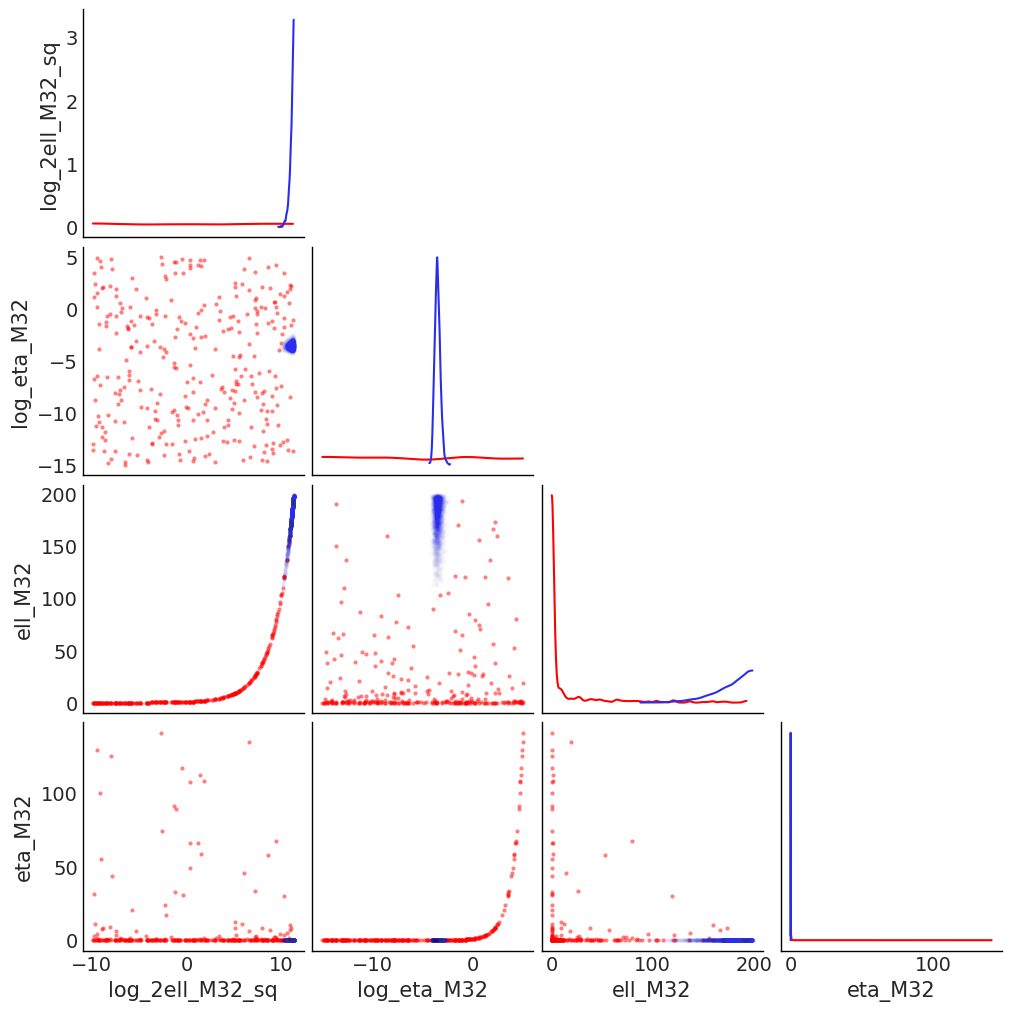

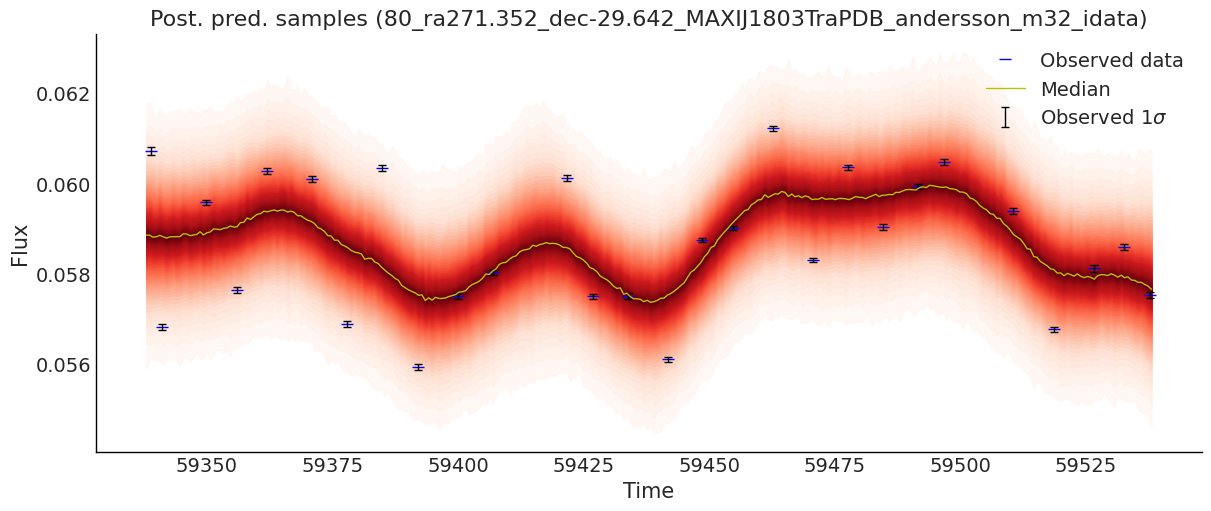

In [14]:
ufn.plot_traces(m32_trace_path, variable_names)
ufn.plot_priorpost_cnr(m32_trace_path, variable_names)
ufn.plot_postpred_samples(m32_trace_path, csv_path)

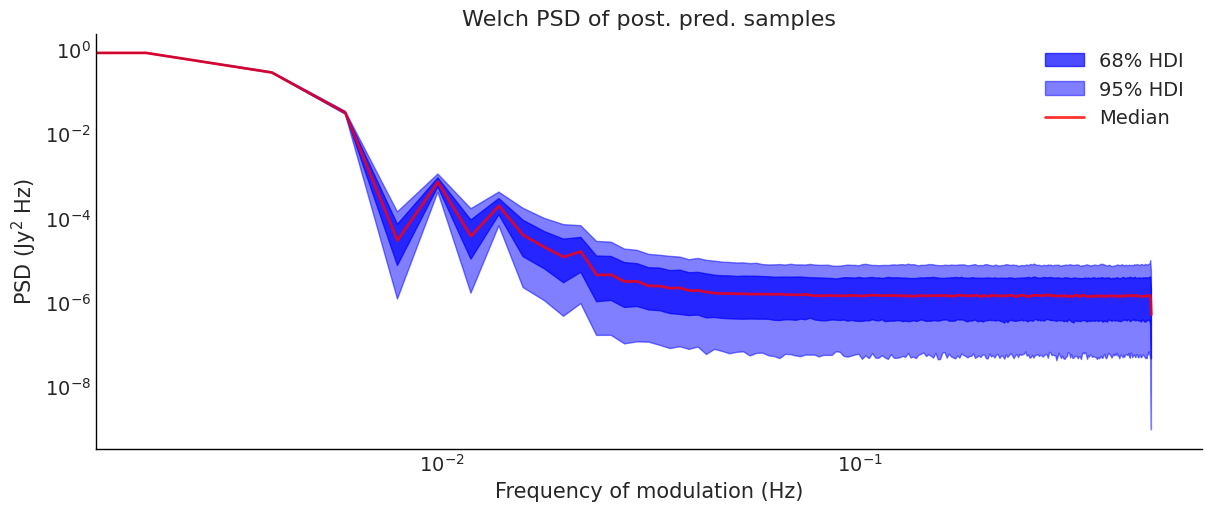

In [15]:
ufn.plot_welch_psd(m32_trace);

## SE + Matern $\frac{3}{2}$ additive kernel

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{SE+M}(\tau))$$

$$k_\textrm{SE+M}(\tau) = \eta^2_\textrm{SE}\exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\} + \eta^2_\textrm{M}\left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\}$$

$$\log 2\ell^2_\textrm{SE} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log \eta_\textrm{SE} \sim \mathcal{U}[-15, 5]$$

$$\log 2\ell^2_\textrm{M} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log \eta_\textrm{M} \sim \mathcal{U}[-15, 5]$$

$$\sigma_{\textrm{WN,i}} \sim \textrm{HalfNormal}(e_i^2)$$

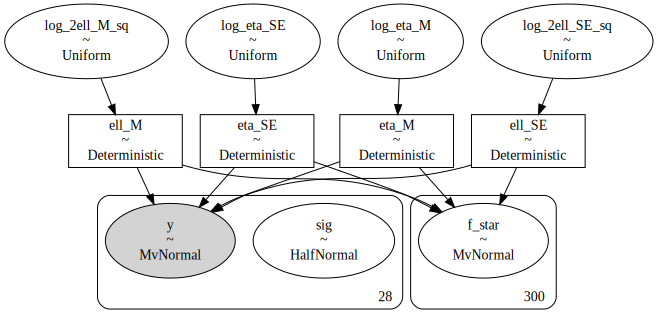

In [16]:
sem32_trace_path = Path(f"traces/{csv_path.stem}_se+m32_idata.nc")
sem32_dag_path = Path(f'dags/{csv_path.stem}_se+m32_dag.dot')

if sem32_trace_path.is_file() and not OVERWRITE_TRACES:
    sem32_trace = az.from_netcdf(sem32_trace_path)
    sem32_dag = gv.Source.from_file(sem32_dag_path)
else:
    sem32_trace, sem32_dag = ufn.fit_sem32_gp(csv_path, multiplicative_kernel=False, rng_seed=rng);
    az.to_netcdf(sem32_trace, sem32_trace_path)
    with open(sem32_dag_path, 'w') as writehandle:
        writehandle.write(sem32_dag.source)

gv.Source(sem32_dag.source)

In [17]:
variable_names = ["log_2ell_SE_sq", "log_2ell_M_sq", "log_eta_SE", "log_eta_M"]
ufn.print_post_summary(sem32_trace_path, variable_names)

median       mad    eti_16%    eti_84%  mcse_median  \
log_2ell_SE_sq  10.917317  0.231571  10.474436  11.182332     0.010937   
log_2ell_M_sq   -3.409456  3.362978  -7.918457   1.448184     0.133162   
log_eta_SE      -3.128203  0.252952  -3.462868  -2.705071     0.010675   
log_eta_M       -6.933828  0.238748  -7.444221  -6.626947     0.008453   

                 ess_median     ess_tail     r_hat       mean        sd  
log_2ell_SE_sq  2231.474420  1321.426725  1.000920  10.835428  0.352114  
log_2ell_M_sq   2177.230144  1004.551430  1.004433  -2.991500  4.564073  
log_eta_SE      2684.655531  1723.406099  1.002638  -3.084839  0.391530  
log_eta_M       1996.683237    68.514346  1.022609  -7.251017  1.302978

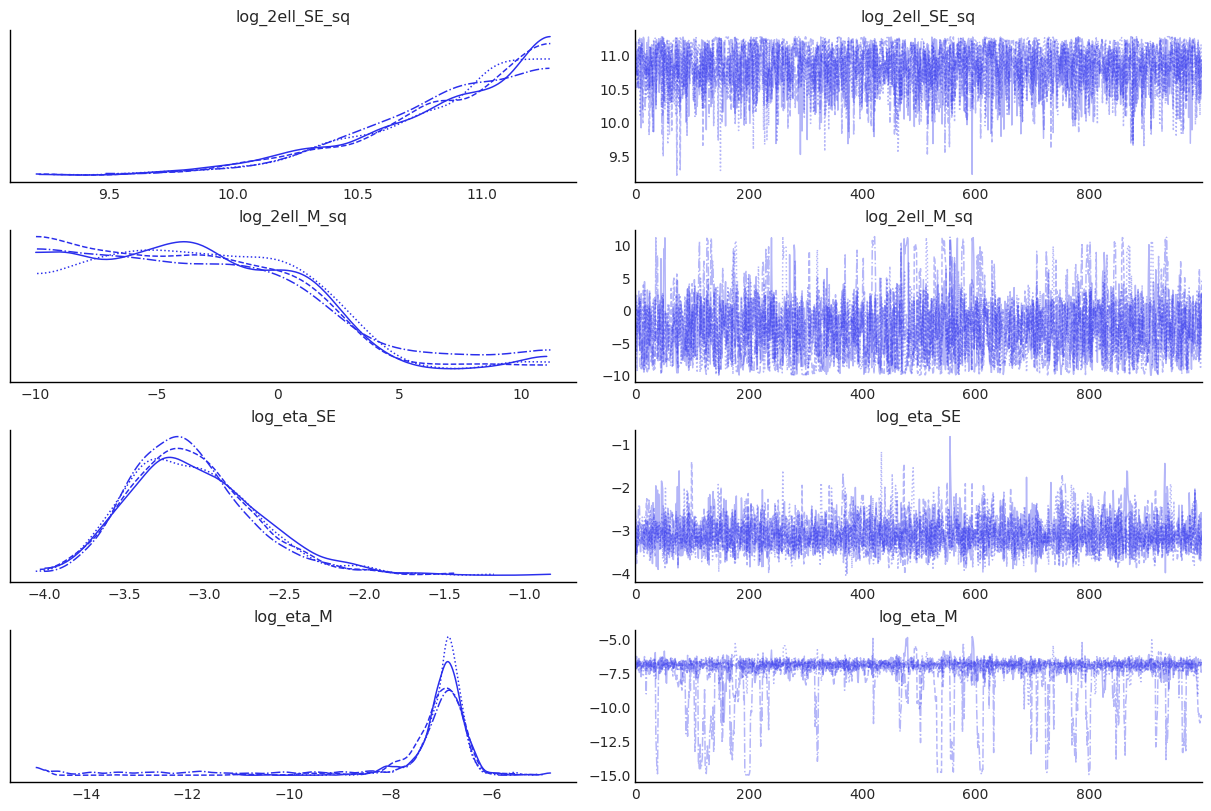

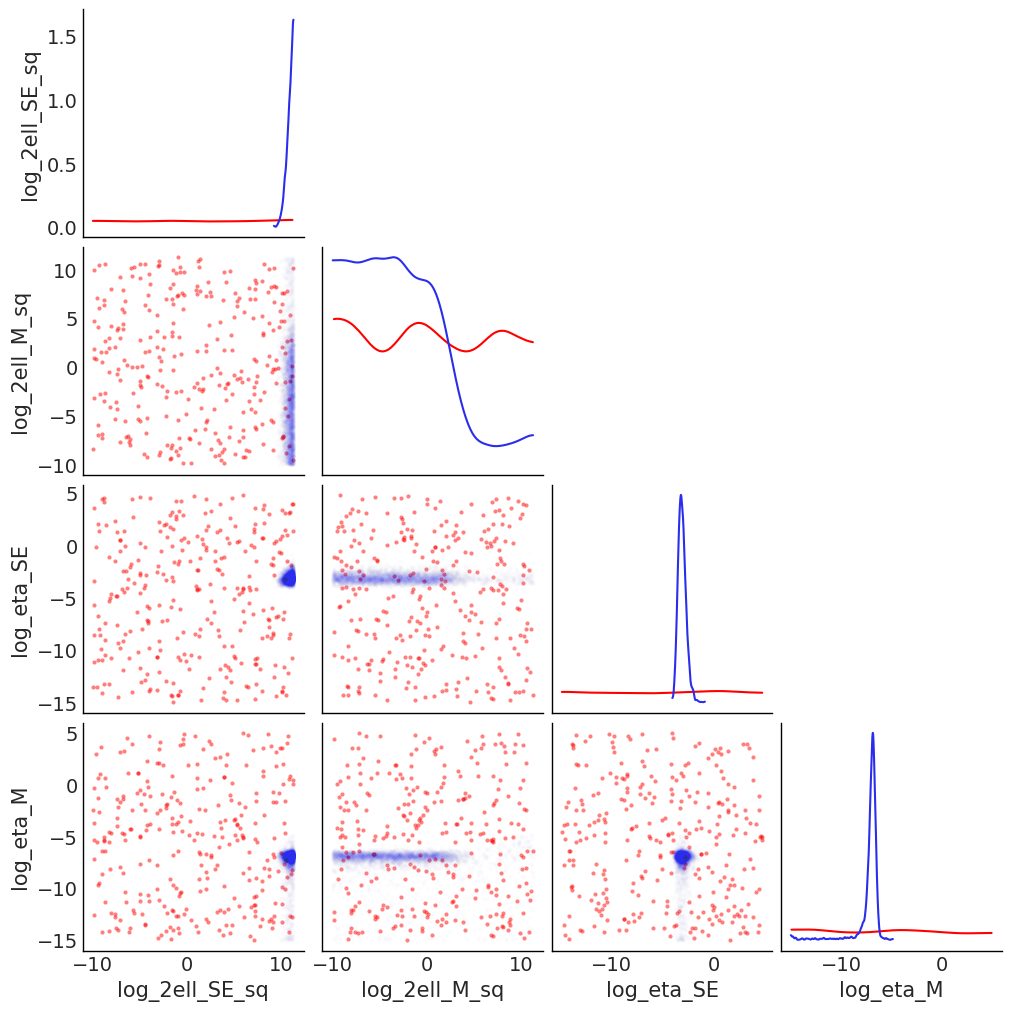

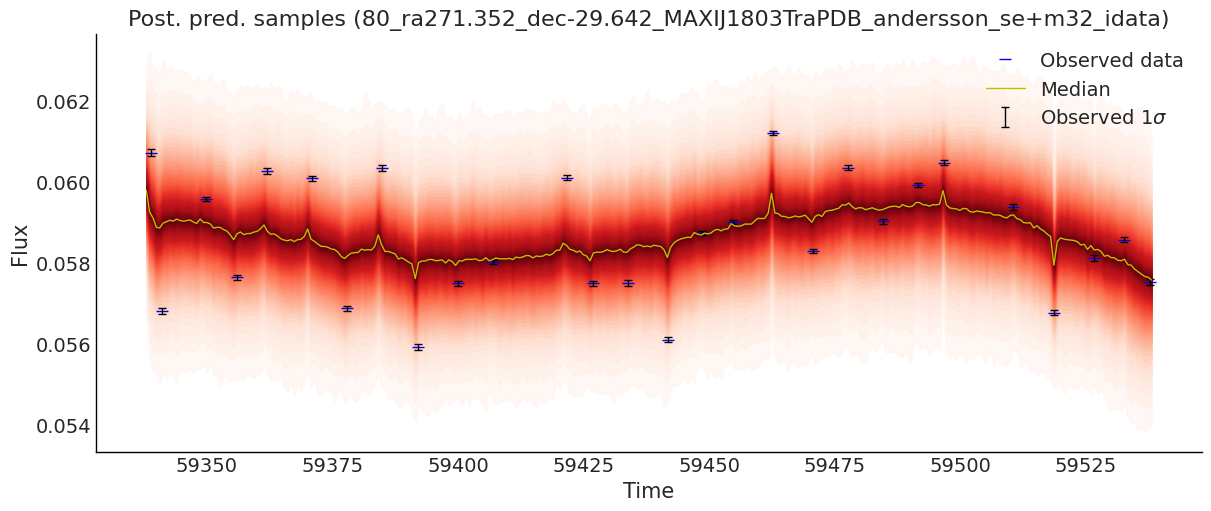

In [18]:
ufn.plot_traces(sem32_trace_path, variable_names)
ufn.plot_priorpost_cnr(sem32_trace_path, variable_names)
ufn.plot_postpred_samples(sem32_trace_path, csv_path)

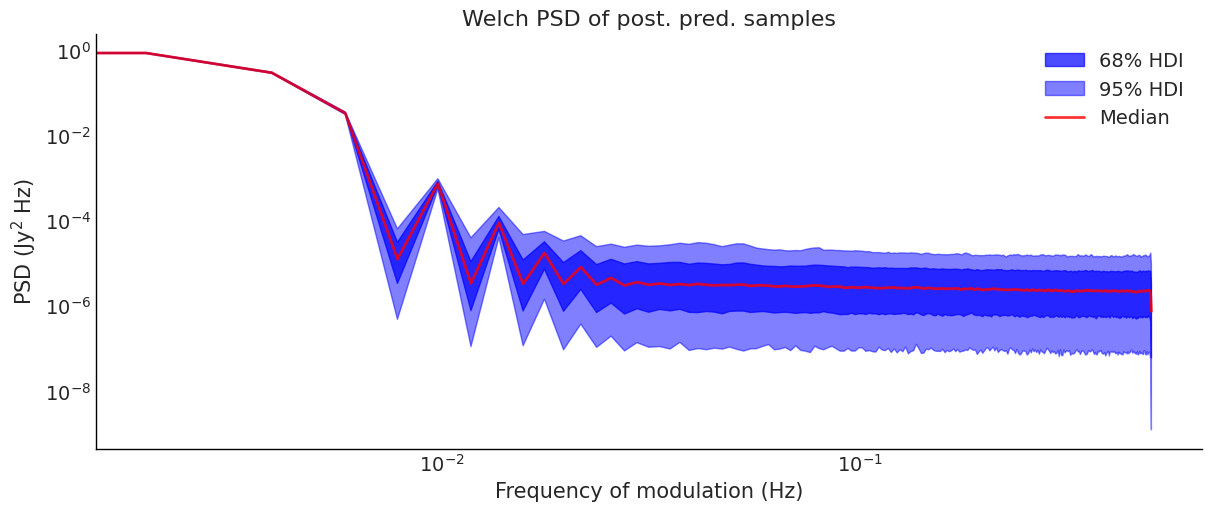

In [19]:
ufn.plot_welch_psd(sem32_trace);

## SE GP + Matern $\frac{3}{2}$ GP

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{GP}(\boldsymbol{0}, k_\textrm{SE}(\tau)) + \mathcal{GP}(\boldsymbol{0}, k_\textrm{M}(\tau))$$

$$k_\textrm{SE}(\tau) = \eta^2_\textrm{SE}\exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\}, \quad k_\textrm{M}(\tau) = \eta^2_\textrm{M}\left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\}$$

$$\log 2\ell^2_\textrm{SE} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log \eta_\textrm{SE} \sim \mathcal{U}[-15, 5]$$

$$\log 2\ell^2_\textrm{M} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log \eta_\textrm{M} \sim \mathcal{U}[-15, 5]$$

$$\sigma_{\textrm{WN,i}} \sim \textrm{HalfNormal}(e_i^2)$$

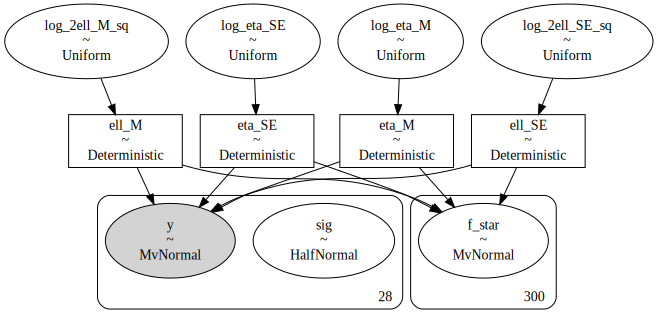

In [20]:
gpSE_gpM32_trace_path = Path(f"traces/{csv_path.stem}_gpSE_gpM32_idata.nc")
gpSE_gpM32_dag_path = Path(f'dags/{csv_path.stem}_gpSE_gpM32_dag.dot')

if gpSE_gpM32_trace_path.is_file() and not OVERWRITE_TRACES:
    gpSE_gpM32_trace = az.from_netcdf(gpSE_gpM32_trace_path)
    gpSE_gpM32_dag = gv.Source.from_file(gpSE_gpM32_dag_path)
else:
    gpSE_gpM32_trace, gpSE_gpM32_dag = ufn.fit_sem32_gp(csv_path, multiplicative_kernel=False, rng_seed=rng);
    az.to_netcdf(gpSE_gpM32_trace, gpSE_gpM32_trace_path)
    with open(gpSE_gpM32_dag_path, 'w') as writehandle:
        writehandle.write(gpSE_gpM32_dag.source)

gv.Source(gpSE_gpM32_dag.source)

In [21]:
variable_names = ["log_2ell_SE_sq", "log_2ell_M_sq", "log_eta_SE", "log_eta_M"]
ufn.print_post_summary(gpSE_gpM32_trace_path, variable_names)

median       mad    eti_16%    eti_84%  mcse_median  \
log_2ell_SE_sq  10.877526  0.242437  10.448482  11.166356     0.007956   
log_2ell_M_sq   -2.699416  3.616616  -7.474185   2.507785     0.220616   
log_eta_SE      -3.128780  0.260250  -3.465067  -2.700186     0.007758   
log_eta_M       -7.028117  0.335605 -10.287162  -6.665828     0.028736   

                 ess_median     ess_tail     r_hat       mean        sd  
log_2ell_SE_sq  2924.981465  1658.938181  1.002494  10.811513  0.352878  
log_2ell_M_sq   2298.682148  1190.744624  1.004112  -2.282334  4.929983  
log_eta_SE      3145.260629  2212.942245  1.001756  -3.082598  0.396868  
log_eta_M        446.541970   216.272041  1.011497  -8.006751  2.214582

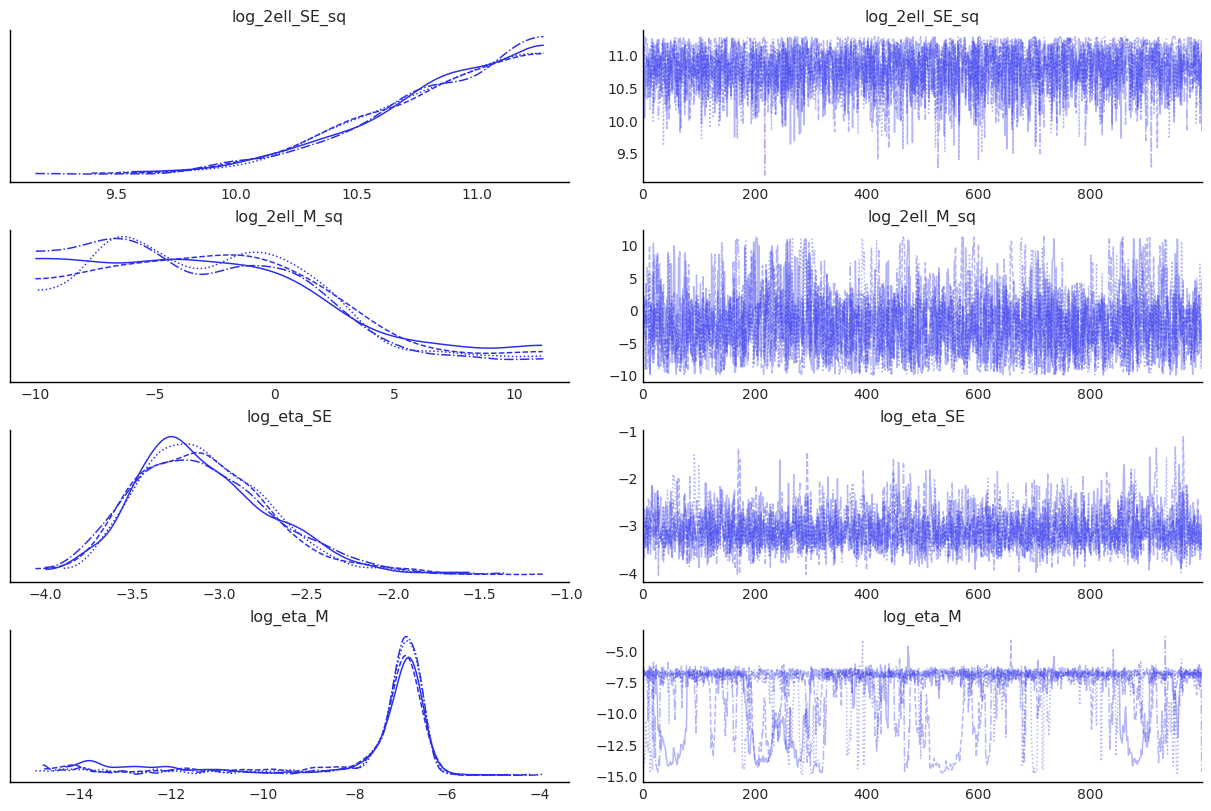

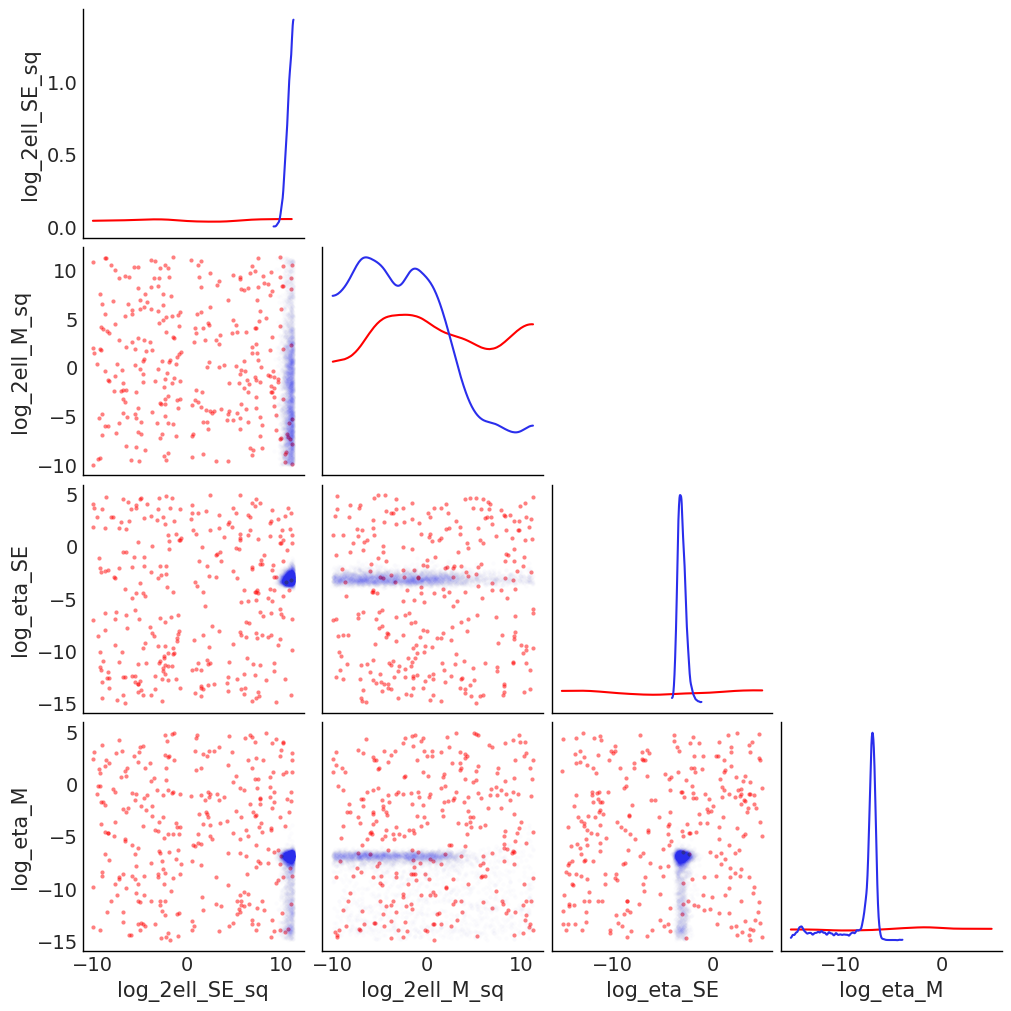

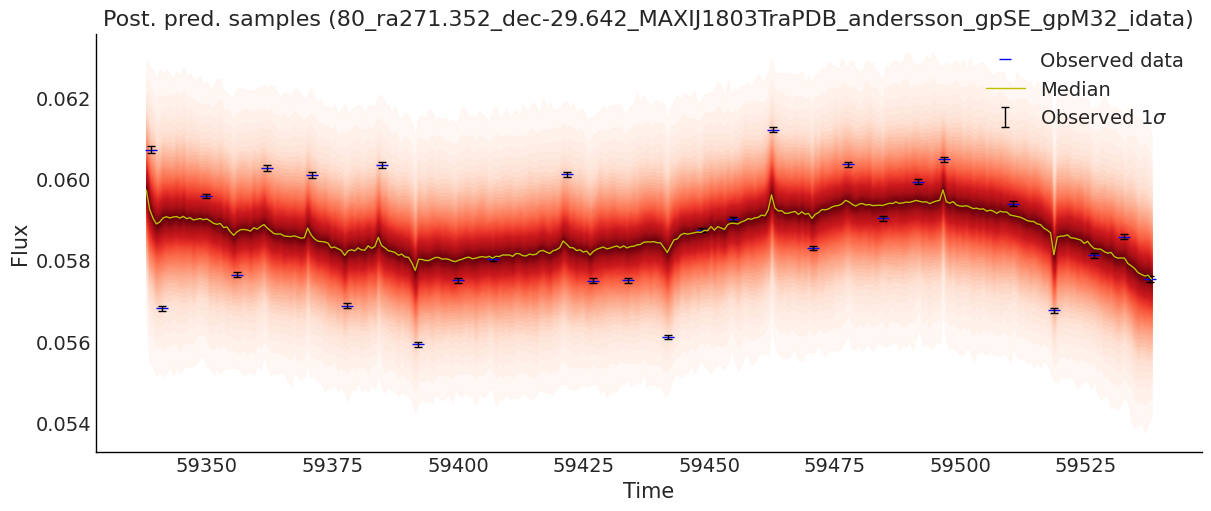

In [22]:
ufn.plot_traces(gpSE_gpM32_trace_path, variable_names)
ufn.plot_priorpost_cnr(gpSE_gpM32_trace_path, variable_names)
ufn.plot_postpred_samples(gpSE_gpM32_trace_path, csv_path)

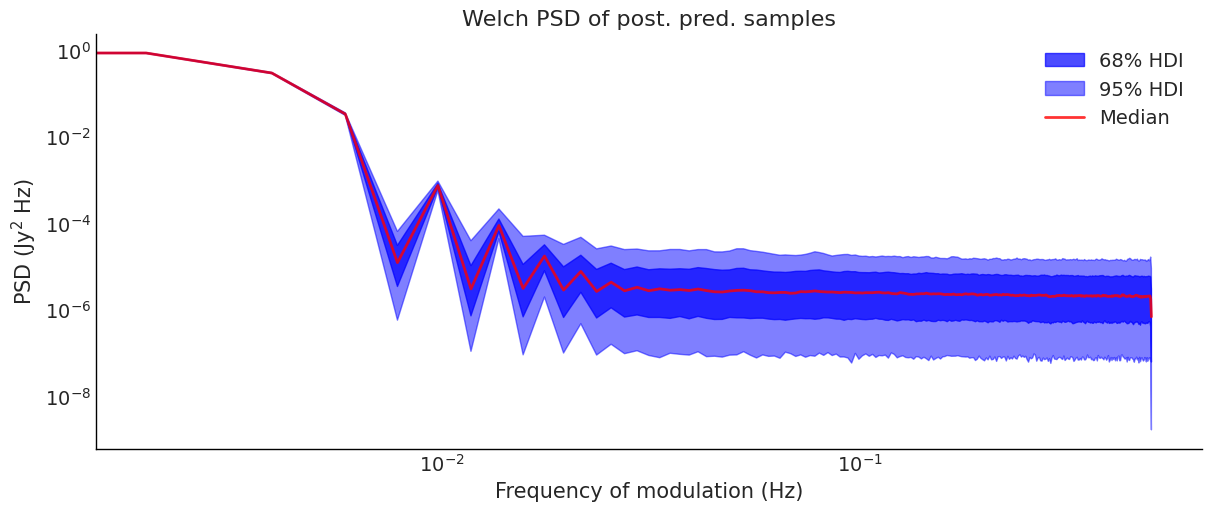

In [23]:
ufn.plot_welch_psd(gpSE_gpM32_trace);

## SE $\times$ Matern $\frac{3}{2}$ Multiplicative Kernel

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\mathrm{SE \times M}(\tau))$$

$$k_\mathrm{SE \times M}(\tau) = \eta^2\exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\} \left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\}$$

$$\log 2\ell^2_\textrm{SE} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log 2\ell^2_\textrm{M} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log \eta \sim \mathcal{U}[-15, 5]$$


$$\sigma_{\textrm{WN,i}} \sim \textrm{HalfNormal}(e_i^2)$$

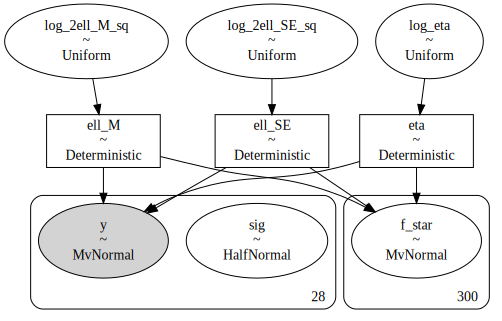

In [24]:
sexm32_trace_path = Path(f"traces/{csv_path.stem}_sexm32_idata.nc")
sexm32_dag_path = Path(f'dags/{csv_path.stem}_sexm32_dag.dot')

if sexm32_trace_path.is_file() and not OVERWRITE_TRACES:
    sexm32_trace = az.from_netcdf(sexm32_trace_path)
    sexm32_dag = gv.Source.from_file(sexm32_dag_path)
else:
    sexm32_trace, sexm32_dag = ufn.fit_sem32_gp(csv_path, multiplicative_kernel=True, rng_seed=rng);
    az.to_netcdf(sexm32_trace, sexm32_trace_path)
    with open(sexm32_dag_path, 'w') as writehandle:
        writehandle.write(sexm32_dag.source)

gv.Source(sexm32_dag.source)

In [25]:
variable_names = ["log_2ell_SE_sq", "log_2ell_M_sq", "log_eta"]
ufn.print_post_summary(sexm32_trace_path, variable_names)

median       mad    eti_16%    eti_84%  mcse_median  \
log_2ell_SE_sq  10.800050  0.301355  10.238034  11.139706     0.009163   
log_2ell_M_sq   11.065534  0.135738  10.776122  11.215924     0.004672   
log_eta         -3.473948  0.169983  -3.714096  -3.217259     0.004621   

                 ess_median     ess_tail     r_hat       mean        sd  
log_2ell_SE_sq  3440.680841  1863.820040  1.000627  10.691701  0.466638  
log_2ell_M_sq   3933.382552  2236.194160  1.001405  11.000430  0.240624  
log_eta         4629.962685  2577.455173  1.001241  -3.463166  0.253450

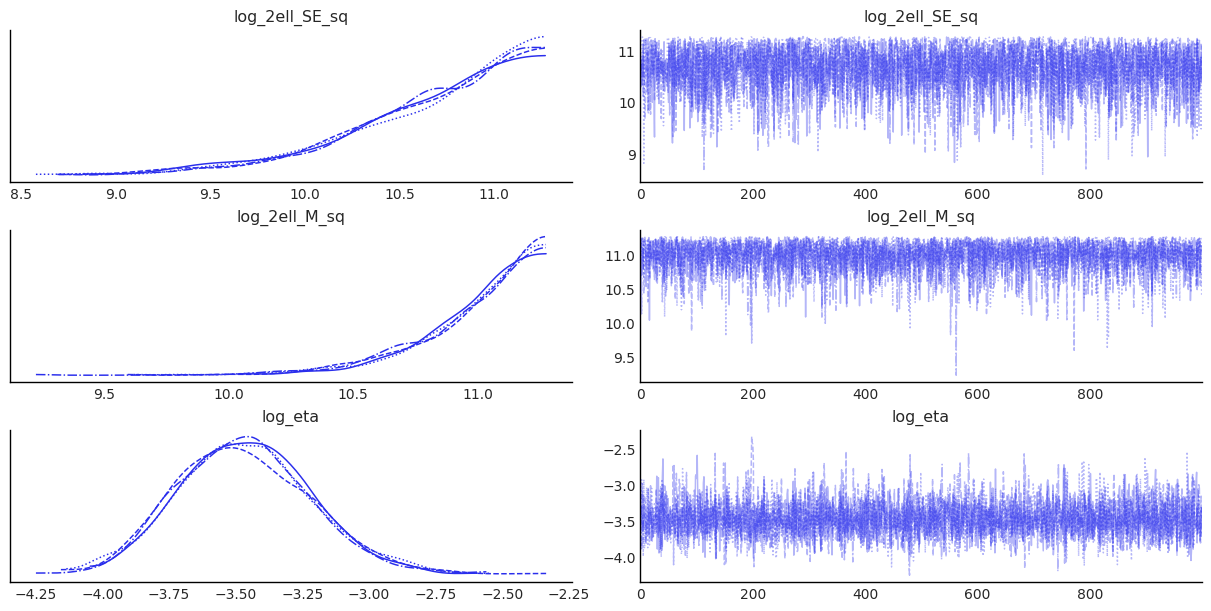

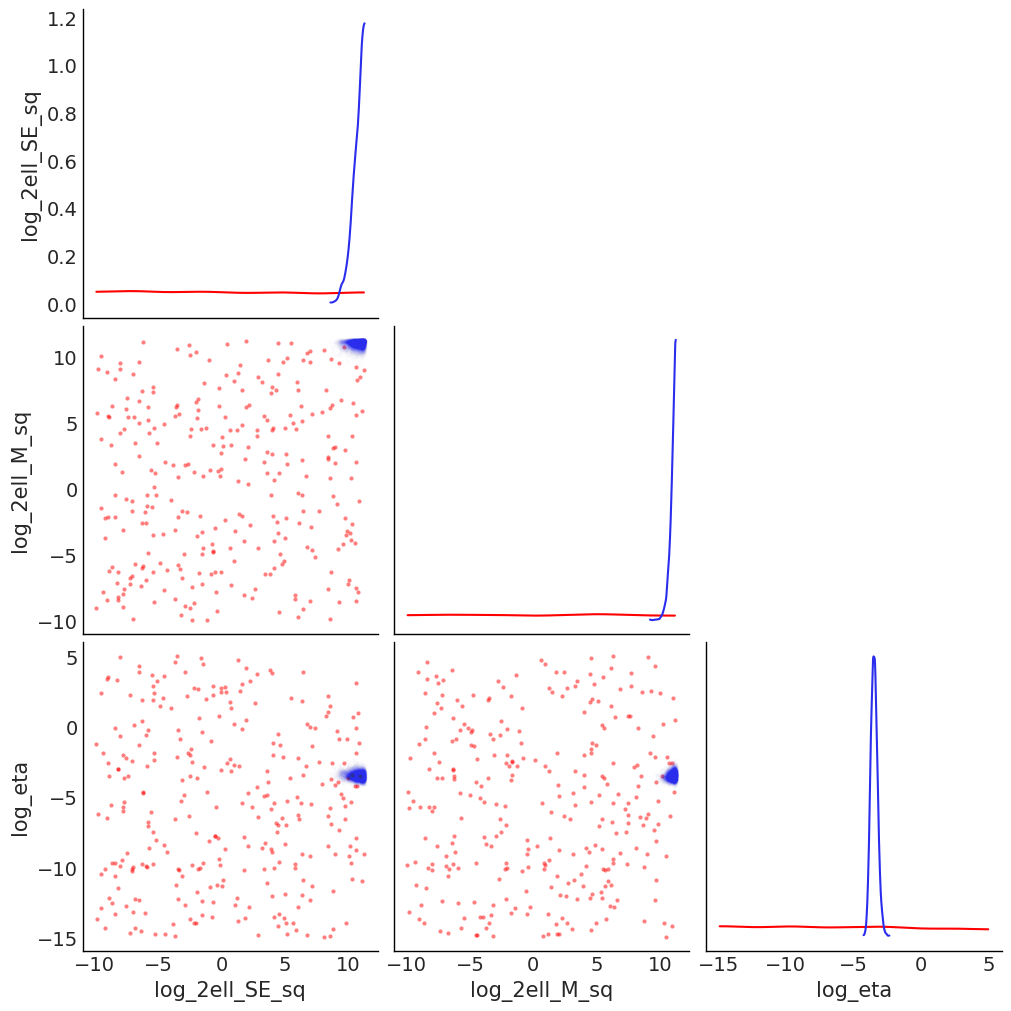

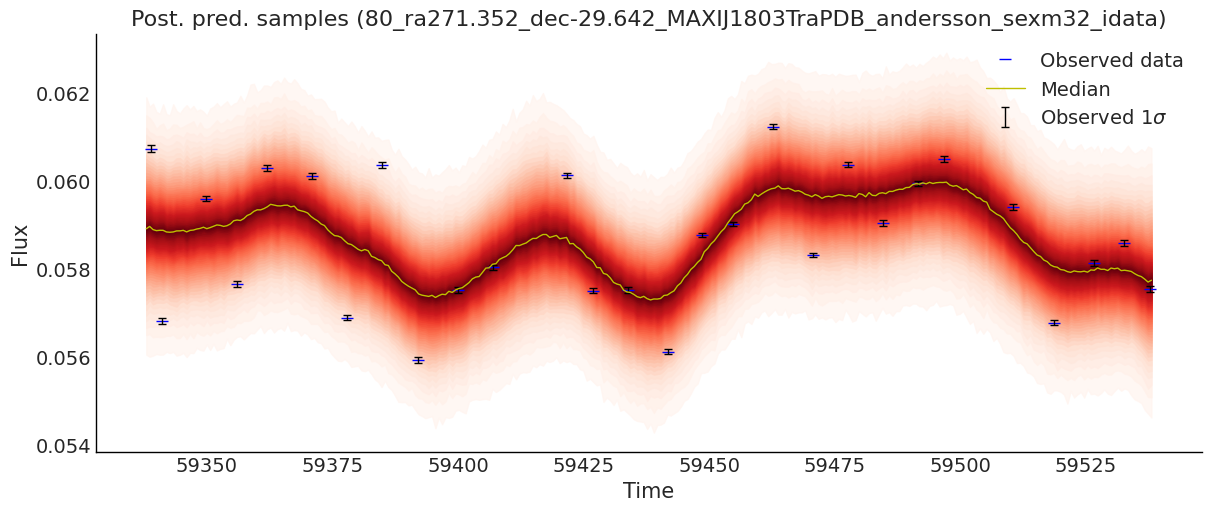

In [26]:
ufn.plot_traces(sexm32_trace_path, variable_names)
ufn.plot_priorpost_cnr(sexm32_trace_path, variable_names)
ufn.plot_postpred_samples(sexm32_trace_path, csv_path)

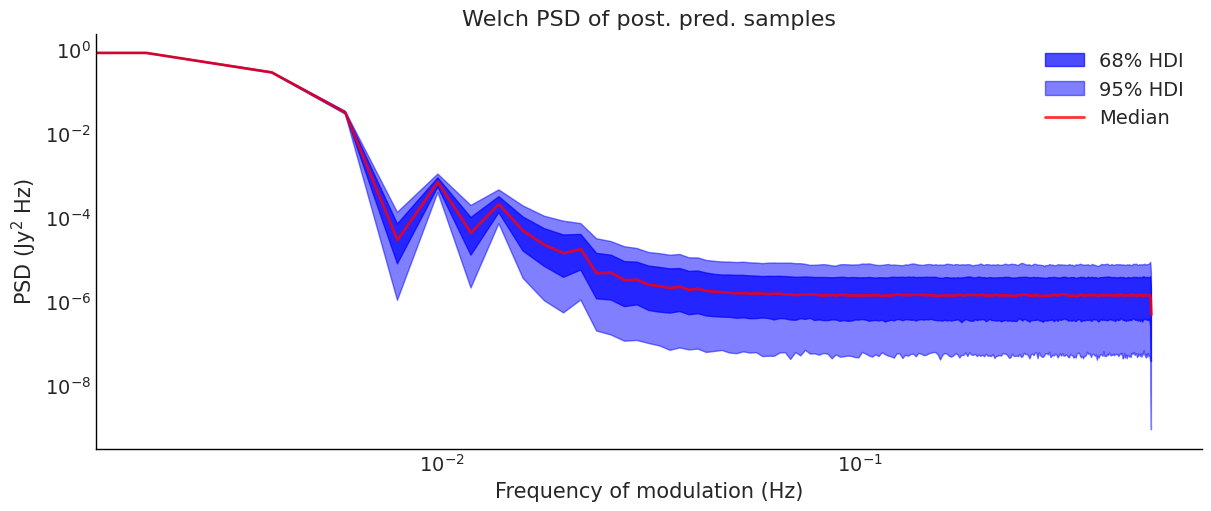

In [27]:
ufn.plot_welch_psd(sexm32_trace);